## Diabetes Prediction Using Logistic Regression

### Aim :
To develop a machine learning model that predicts whether an individual is diabetic or not, based on medical attributes such as Glucose, BMI, Age, and more.

### Methodology :
1. **Data Loading** – Import the dataset using pandas.
2. **Data Cleaning and Preprocessing** – Handle missing/zero values, normalize features.
3. **Exploratory Data Analysis (EDA)** – Understand relationships between features using visuals and statistics.
4. **Model Training** – Use Logistic Regression to classify patients as diabetic or non-diabetic.
5. **Model Evaluation** – Evaluate model performance using accuracy and other metrics.
6. **Prediction Demo** – Test the model on real or custom input values.

### Rescources :
**Dataset**: [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

**Tools/Libraries**:
  - Python (Data Analysis in Jupyter Notebook)
  - Numpy, Pandas
  - Scikit-learn (for modeling and evaluation)
  - Seaborn & Matplotlib (for visualizations and plots)

### Code:

In [148]:
import pandas as pd
import numpy as np

In [78]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 1- individual has diabetes
# 0 - individual does not have diabetes

In [11]:
df.info() # taking a detailed look at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.dtypes # looking at all the different datatypes in the dataframe

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.describe() # statistical inferences made from the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.shape[0] # we have data of 768 patients in the dataframe

768

In [114]:
pos_count=0 # count for number of diabetic people
for i in df["Outcome"] :
    if(i==1):
        pos_count+=1
print(pos_count)

268


In [119]:
neg_count=768-pos_count # count of people who do not have diabetes
print(neg_count)

500


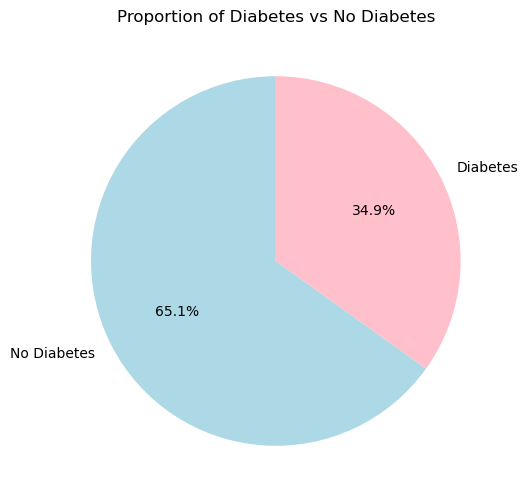

In [124]:
# Pie chart of outcomes
outcome_counts=[500,268]
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], 
        autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title('Proportion of Diabetes vs No Diabetes')
plt.show()

In [79]:
# replacing the 0 insulin levels with mean insulin levels 
mean_insulin=df["Insulin"].mean()
df["Insulin"]=df["Insulin"].replace(0,mean_insulin)

In [80]:
df.head(5) # We have replaced the missing insulin levels with the mean insulin levels

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.799479,33.6,0.627,50,1
1,1,85,66,29,79.799479,26.6,0.351,31,0
2,8,183,64,0,79.799479,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [81]:
# doing the same for all other parameters
mean_skinthickness=df["SkinThickness"].mean()
df["SkinThickness"]=df["SkinThickness"].replace(0,mean_skinthickness)

mean_glucose=df["Glucose"].mean()
df["Glucose"]=df["Glucose"].replace(0,mean_glucose)

mean_BP=df["BloodPressure"].mean()
df["BloodPressure"]=df["BloodPressure"].replace(0,mean_BP)

mean_BMI=df["BMI"].mean()
df["BMI"]=df["BMI"].replace(0.0,mean_BMI)

mean_DPF=df["DiabetesPedigreeFunction"].mean()
df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].replace(0,mean_DPF)

mean_age=df["Age"].mean()
df["Age"]=df["Age"].replace(0,mean_age)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [82]:
print((df["BMI"] == 0.0).sum()) # counts the number of 0s in BMI column

0


 as the output is 0, we have successfully replaced all the zero entries

In [83]:
# Now, we will define the target(y) and the feature(x) variables
X=df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y=df["Outcome"]

In [87]:
# We will now split the dataset into training and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

test_size=0.2 means we have taken 20 percent of the data as test data

In [94]:
# Training the Logistic Regression Model After feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

x_train_scaled is a numpy array whereas X_test is a dataframe


In [98]:
# Evaluating the model now
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [100]:
# Checking the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[83 16]
 [20 35]]


In [102]:
# checking the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



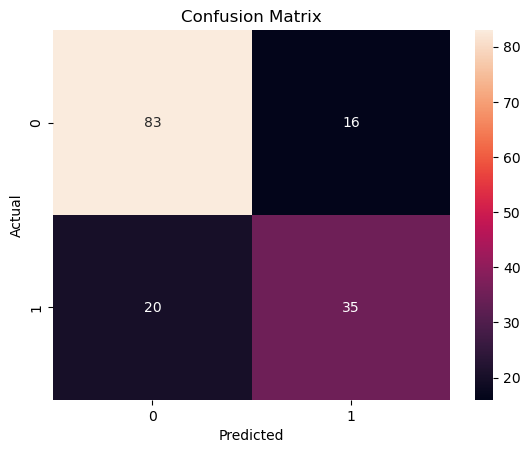

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [136]:
# Picking a row from the dataframe and testing the output
sample = df.drop("Outcome", axis=1).iloc[[0]]  # first row, without the label
#sample = sample.values.reshape(1, -1), this gave a warning
# Scale and then predict
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("Prediction:", prediction)

Prediction: [1]


We use .reshape(1, -1) only when we are working with a 1D NumPy array and need to convert it into a 2D shape, because scikit-learn expects input data as a 2D array,even for a single sample.

In [147]:
# Manually predict for a specific row
row_number=2 # enter the row number to predict here (starting from 0)
sample = df.drop("Outcome", axis=1).iloc[[row_number]]
sample_scaled = scaler.transform(sample)
print(f"Prediction for row {row_number} :", model.predict(sample_scaled))

Prediction for row 2 : [1]


### Conclusion :
- We built a Logistic Regression model to predict whether a person has diabetes based on several medical attributes.
- After cleaning and preprocessing the data (handling zeros, scaling, etc.), we achieved an accuracy of **76.623%**.
- This indicates that our model performs reasonably well, although there is still room for improvement.

### Key Insights :
- Glucose and BMI seem to be strong indicators of diabetes (you can confirm this using `df.corr()` heatmap).
- Missing or zero values had a significant impact on accuracy if not treated properly.

### Model Limitations :
- The dataset is slightly imbalanced between diabetic and non-diabetic patients.
- Logistic Regression may not capture complex nonlinear patterns in the data.

### Future Improvements :
- Try more complex models like Random Forest, SVM, or XGBoost to boost accuracy.
- Use techniques like cross-validation and hyperparameter tuning.
- Build a simple UI or web app for diabetes prediction (using Streamlit or Flask).

### Acknowledgments :
- Dataset: Pima Indians Diabetes Dataset (UCI Repository)
- Libraries: Scikit-learn, Pandas, Numpy, Matplotlib, Seaborn

### Manual Predictor :

In [152]:
# Manually predict for a specific row
row_number=2 # enter the row number to predict here (starting from 0)
sample = df.drop("Outcome", axis=1).iloc[[row_number]]
sample_scaled = scaler.transform(sample)
print(f"Prediction for row {row_number} :", model.predict(sample_scaled))

Prediction for row 2 : [1]
